<p style="font-size:20px">You may need to install <b>tqdm</b> and <b>cv2</b>. Simply do <b>conda install tqdm</b> and <b>conda install cv2</b> in your virtual environment. You are also free to use other tools to fetch the image files and resize them.</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from tqdm import tqdm
import pickle
import os
import cv2
import timeit

<p style="font-size:20px">In Problem 4a, you will preprocess the dogs and cats data and save them into "Pickle" files for later use.

In [8]:
train_dir = "dogs-vs-cats/train"
test_dir = "dogs-vs-cats/test1"

<p style="font-size:20px">Step 1: Kaggle does not provide a file that contains the labels. So we need to create labels from the training file.

In [3]:
"""
a function to return the label of a image
input: 
    image
return:
    if the image is cat, return [1,0]
    if the image is dog, return [0,1]
"""
def label_img(img):
    #################
    label = img[0:3]
    if label == 'cat':
        return np.array([1,0])
    elif label == 'dog':
        return np.array([0,1])
    return np.array([0,0])
    #pass
    #################

<p style="font-size:20px">Step 2: define a function to fetch all images from the training directory and return a <b>list</b> that every element contains two <b>Numpy array</b>:image and its label.

In [4]:
"""
Hint 1: use tqdm to fetch file
    for file in tqdm(os.listdir(directory)):
        ...

Hint 2: use cv2 to read file
    cv2.imread(path)

Hint 3: use cv2 to resize img
    cv2.resize(img, (size, size))
"""
def create_train_data():
    ###create a list###
    training_set = []
    
    ####for loop to fetch img from directory (hint:use tqdm)###
    for file in tqdm(os.listdir(train_dir)):
        ###get label of img###
           label = label_img(file)
        ###use cv2 to read the img and resize the it to (227 x 227)###
           img = cv2.imread(os.path.join(train_dir, file))
           img_resize = cv2.resize(img, (227, 227))
        ###append the img and label to the list###
           training_set.append([img_resize, label])
    ###shuffle training data###
    shuffle(training_set)
    ###return training data###
    return training_set

<p style="font-size:20px">Step 3: define a similar function to fetch all test data. You don't need to label them.

In [6]:
def create_test_data():
    test_set = []
    
    ####for loop to fetch img from directory (hint:use tqdm)###
    for file in tqdm(os.listdir(test_dir)):
        ###use cv2 to read the img and resize the it to (227 x 227)###
           img = cv2.imread(os.path.join(test_dir, file))
           img_resize = cv2.resize(img, (227, 227))
        ###append the img and label to the list###
           test_set.append(img_resize)
    ###shuffle training data###
    shuffle(test_set)
    ###return training data###
    return test_set

<p style="font-size:20px">Step 4: create your train and test data</p>

In [9]:
train_data = create_train_data()
test_data = create_test_data()

100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [01:14<00:00, 168.43it/s]


<p style="font-size:20px"> You can visualize the image using plt.imshow()

(227, 227, 3)


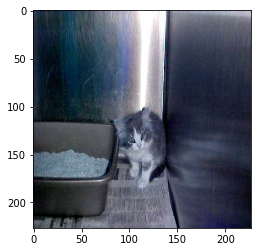

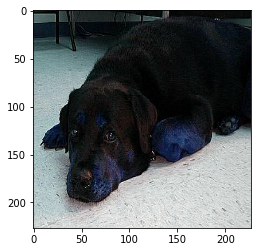

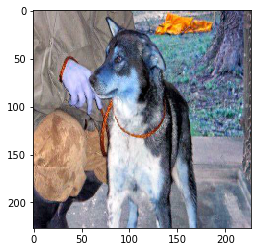

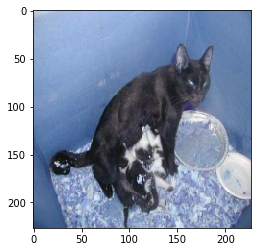

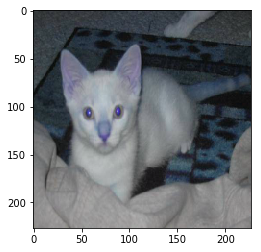

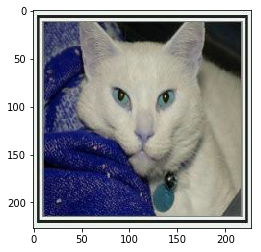

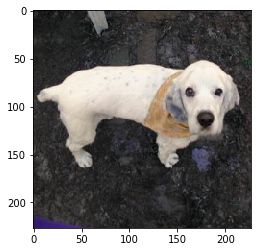

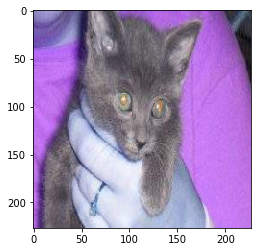

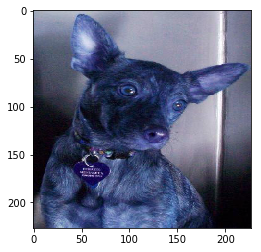

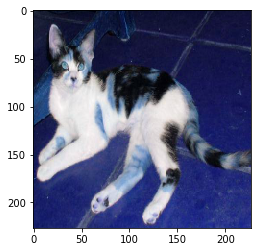

In [10]:
for i in range(10):
  plt.figure()
  plt.imshow(train_data[i][0])
print(train_data[0][0].shape)

<p style="font-size:20px">Step 5: Reshape all images to have shape (#, 227, 227, 3). Use 500 training data as your validation set.

In [11]:
for i in tqdm(range(len(train_data))):
     train_data[i][0] = train_data[i][0].reshape((1,227,227,3))
for i in tqdm(range(len(test_data))):
     test_data[i] = test_data[i].reshape((1,227,227,3))
val_set, train_set = train_data[:500], train_data[500:]

100%|████████████████████████████████████████████████████████████████████████| 12500/12500 [00:00<00:00, 855826.71it/s]


<p style="font-size:20px">Step 6: Save training data, validation data and testing data as Pickle object</p>
<p style="font-size:20px">Note: You can't save all training data into one file because it has several Gigabytes. Separate your data wisely and save them into different files</p>

In [13]:
train_size = len(train_set)
test_size = len(test_data)
for i in range(10):
    with open('train'+str(i)+'.pkl', 'wb') as f:
        pickle.dump(train_set[i*(train_size // 10):min((i + 1) * (train_size // 10), train_size)], f)
    with open('test'+str(i)+'.pkl', 'wb') as ft:
        pickle.dump(test_data[i*(test_size // 10):min((i + 1) * (test_size // 10), test_size)], ft)
        
    with open('validation.pkl', 'wb') as fv:
        pickle.dump(val_set, fv)